<h1><b>Sentiment Anlysis on Movie reviews

<b>In this project we build a sentiment anlysis on review and last we compare the cumputed sentiment with the original sentiment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
review = pd.read_csv('../NLP Datasets/Movie_Review/train.tsv', sep='\t')

In [4]:
review.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [10]:
#review.Phrase

In [14]:
#Remove nan and empty space cells
blank = []

review.dropna(inplace=True)

for i,cell in review.Phrase.iteritems():
    if type(cell)==str:
        if cell.isspace():
            blank.append(i)

In [15]:
blank

[2005]

In [19]:
review.drop(blank,inplace=True)

In [20]:
review['Sentiment'].value_counts()

2    79582
3    32927
1    27272
4     9206
0     7072
Name: Sentiment, dtype: int64

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
# we find neg,pos,neu
d = {0:0,1:0,2:1,3:2,4:2}
review['Sentiment'] = review['Sentiment'].map(d)

In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [80]:
sid = SentimentIntensityAnalyzer()

In [87]:
print(review[review['Sentiment']==2]['Phrase'].iloc[5])

quiet , introspective and entertaining independent


In [43]:
a = 'introspective and entertaining'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [47]:
review['Score'] = review['Phrase'].apply(lambda x: sid.polarity_scores(x))

In [88]:
review[review['Sentiment']==1]['Score'].apply(lambda c: c['compound']).tail(10)

156045   -0.8074
156046    0.0000
156048   -0.8074
156049   -0.6486
156050   -0.6486
156053   -0.4588
156054   -0.4588
156055    0.0000
156058    0.0000
156059    0.0000
Name: Score, dtype: float64

0 = com<=0
1 = 

In [90]:
review[review['Sentiment']==1]['Score'].tail(10)

156045    {'neg': 0.454, 'neu': 0.546, 'pos': 0.0, 'comp...
156046    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
156048    {'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'comp...
156049    {'neg': 0.639, 'neu': 0.361, 'pos': 0.0, 'comp...
156050    {'neg': 0.726, 'neu': 0.274, 'pos': 0.0, 'comp...
156053    {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...
156054    {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...
156055    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
156058    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
156059    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Score, dtype: object

In [94]:
review['neg'] = review['Score'].apply(lambda i: i['neg'])
review['neu'] = review['Score'].apply(lambda i: i['neu'])
review['pos'] = review['Score'].apply(lambda i: i['pos'])

In [98]:
review['Score'].iloc[1]['pos']

0.195

In [102]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156059 entries, 0 to 156059
Data columns (total 8 columns):
PhraseId      156059 non-null int64
SentenceId    156059 non-null int64
Phrase        156059 non-null object
Sentiment     156059 non-null int64
Score         156059 non-null object
neg           156059 non-null float64
neu           156059 non-null float64
pos           156059 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 10.7+ MB


In [127]:
review['label'] = review['Score'].apply(lambda x: 0 if (x['neg']>x['neu'] and x['neg']>x['pos']) else (1 if x['neg']<x['neu'] and x['neu']>x['pos']  else 2))

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
print(accuracy_score(review['Sentiment'],review['label']))

0.5453898845949289


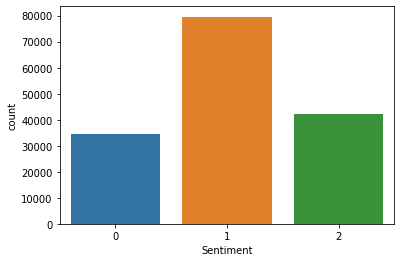

In [131]:
sns.countplot(review['Sentiment'])

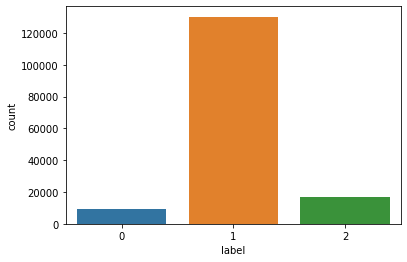

In [132]:
sns.countplot(review['label'])